# <font color=blue><div align="center">Seats Allocation within an Aircraft</div></font>

### <font color=blue><div align="center">29-02-2024</div></font>

## Modules

In [1]:
# Basic modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import random

# Gurobi module
from gurobipy import *

## Data Extraction

In [2]:
number_of_seats = 174
weight_f = 70
weight_m = 85
weight_d = 92.5
number_of_rows = 29
number_of_columns = 6

In [3]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('./DataSeating 2024.xlsx', sheet_name=0 , skipfooter=2)

In [4]:
# Display the DataFrame
df

,Numéro du groupe,Femmes,Hommes,WCHR,TransitTime
0,1,NaN,1.0,NaN,01:15:00
1,2,1.0,NaN,NaN,00:00:00
2,3,NaN,1.0,NaN,00:00:00
3,4,1.0,NaN,NaN,00:00:00
4,5,NaN,2.0,NaN,05:25:00
...,...,...,...,...,...
106,107,1.0,NaN,NaN,03:30:00
107,108,2.0,NaN,NaN,05:25:00
108,109,2.0,NaN,NaN,05:25:00
109,110,2.0,NaN,NaN,01:35:00


In [5]:

Passagers = dict()
i = 1

number_f = 0
number_m = 0
number_d = 0
transit_times= set()
for group in df.itertuples():
    for j in range(2,5):
        if not pd.isna(group[j]):
            for k in range(int(group[j])):
                Passagers[i] = {'gender': j-2, 'group':group[1], 'transit': float('inf') }
                if group[5].hour*60 + group[5].minute != 0:
                    Passagers[i]['transit'] = group[5].hour*60 + group[5].minute
                    transit_times.add(group[5].hour*60 + group[5].minute)
                if j == 2: number_f+=1
                elif j==3: number_m+=1
                else: number_d+=1

                i+=1    
Passagers

{1: {'gender': 1, 'group': 1, 'transit': 75},
 2: {'gender': 0, 'group': 2, 'transit': inf},
 3: {'gender': 1, 'group': 3, 'transit': inf},
 4: {'gender': 0, 'group': 4, 'transit': inf},
 5: {'gender': 1, 'group': 5, 'transit': 325},
 6: {'gender': 1, 'group': 5, 'transit': 325},
 7: {'gender': 0, 'group': 6, 'transit': inf},
 8: {'gender': 0, 'group': 7, 'transit': 190},
 9: {'gender': 0, 'group': 8, 'transit': 80},
 10: {'gender': 1, 'group': 8, 'transit': 80},
 11: {'gender': 1, 'group': 9, 'transit': 140},
 12: {'gender': 0, 'group': 10, 'transit': inf},
 13: {'gender': 0, 'group': 11, 'transit': 235},
 14: {'gender': 1, 'group': 11, 'transit': 235},
 15: {'gender': 1, 'group': 12, 'transit': 70},
 16: {'gender': 1, 'group': 13, 'transit': inf},
 17: {'gender': 0, 'group': 14, 'transit': inf},
 18: {'gender': 1, 'group': 14, 'transit': inf},
 19: {'gender': 1, 'group': 15, 'transit': 360},
 20: {'gender': 1, 'group': 16, 'transit': 95},
 21: {'gender': 0, 'group': 17, 'transit': 60

In [6]:
Groups = dict()

for i, passager in Passagers.items():

    if passager['group'] in Groups:
        Groups[passager['group']].append(i)
    else :
        Groups[passager['group']] = [i]
for i in range(1,len(df)+1):
    if len(Groups[i]) ==1: del(Groups[i])
Groups

{5: [5, 6],
 8: [9, 10],
 11: [13, 14],
 14: [17, 18],
 17: [21, 22],
 19: [24, 25, 26, 27],
 20: [28, 29, 30, 31],
 21: [32, 33],
 23: [35, 36],
 24: [37, 38],
 27: [41, 42],
 31: [46, 47],
 34: [50, 51],
 35: [52, 53],
 39: [57, 58],
 45: [64, 65],
 51: [71, 72],
 55: [76, 77],
 56: [78, 79],
 57: [80, 81],
 59: [83, 84],
 61: [86, 87],
 63: [89, 90],
 65: [92, 93, 94],
 68: [97, 98],
 71: [101, 102],
 77: [108, 109],
 87: [119, 120],
 92: [125, 126],
 95: [129, 130],
 103: [138, 139],
 104: [140, 141],
 108: [145, 146],
 109: [147, 148],
 110: [149, 150]}

In [7]:
Passager_Group = dict()

for gr in Groups.values():
    for i in range(len(gr)):
        Passager_Group[gr[i]] = []
        for j in range(len(gr)):
            if i !=j : Passager_Group[gr[i]].append(gr[j])

Passager_Group

{5: [6],
 6: [5],
 9: [10],
 10: [9],
 13: [14],
 14: [13],
 17: [18],
 18: [17],
 21: [22],
 22: [21],
 24: [25, 26, 27],
 25: [24, 26, 27],
 26: [24, 25, 27],
 27: [24, 25, 26],
 28: [29, 30, 31],
 29: [28, 30, 31],
 30: [28, 29, 31],
 31: [28, 29, 30],
 32: [33],
 33: [32],
 35: [36],
 36: [35],
 37: [38],
 38: [37],
 41: [42],
 42: [41],
 46: [47],
 47: [46],
 50: [51],
 51: [50],
 52: [53],
 53: [52],
 57: [58],
 58: [57],
 64: [65],
 65: [64],
 71: [72],
 72: [71],
 76: [77],
 77: [76],
 78: [79],
 79: [78],
 80: [81],
 81: [80],
 83: [84],
 84: [83],
 86: [87],
 87: [86],
 89: [90],
 90: [89],
 92: [93, 94],
 93: [92, 94],
 94: [92, 93],
 97: [98],
 98: [97],
 101: [102],
 102: [101],
 108: [109],
 109: [108],
 119: [120],
 120: [119],
 125: [126],
 126: [125],
 129: [130],
 130: [129],
 138: [139],
 139: [138],
 140: [141],
 141: [140],
 145: [146],
 146: [145],
 147: [148],
 148: [147],
 149: [150],
 150: [149]}

## Model

Defining the relevant variables of the problem

In [8]:

m = Model("Seats_Allocation")

AssignmenVarDict = {(i, j, k) : m.addVar(vtype = GRB.BINARY, name=f'passager_{i}_{j}_{k}')
                    for i in range(1, number_of_rows + 1)
                    for j in range(1, number_of_columns + 1)
                    for k in range(1, len(Passagers)+1)}

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-04


The constraints

- Every person has a seat

In [9]:
SEATSASSIGNMENTCONST = m.addConstr(quicksum([AssignmenVarDict[(i, j, k)]
                                             for i in range(1, number_of_rows + 1)
                                             for j in range(1, number_of_columns + 1)
                                             for k in range(1,len(Passagers)+1)])
                                             == len(Passagers))


- Every person has one seat

In [10]:
PERSONSEATCONSTDIC = { k: m.addConstr(quicksum([AssignmenVarDict[(i, j, k)]
                                                for i in range(1, number_of_rows + 1)
                                                for j in range(1, number_of_columns + 1) ])
                                                == 1)
                                                for k in range(1,len(Passagers)+1) }

- Every seat is allocated to a single person

In [11]:
ALLOCATIONCONSTDIC = { (i,j) : m.addConstr(quicksum([AssignmenVarDict[(i,j,k)]
                                                     for k in range(1, len(Passagers)+1)])
                                                     <=1)
                                                     for i in range(1, number_of_rows + 1)
                                                     for j in range(1, number_of_columns+1) }

- Barycenter constraint

In [12]:

i_m = quicksum([weight_m * i* AssignmenVarDict[(i,j,k)]
                for i in range(1, number_of_rows+1)
                for j in range(1, number_of_columns+1 )
                for k in range(1, len(Passagers)+1)
                if Passagers[k]['gender']==1])

i_f = quicksum([weight_m * i* AssignmenVarDict[(i,j,k)]
                for i in range(1, number_of_rows+1)
                for j in range(1, number_of_columns+1 )
                for k in range(1, len(Passagers)+1)
                if Passagers[k]['gender']==0])

i_d = quicksum([weight_m * i* AssignmenVarDict[(i,j,k)]
                for i in range(1, number_of_rows+1)
                for j in range(1, number_of_columns+1 )
                for k in range(1, len(Passagers)+1)
                if Passagers[k]['gender']==2])

i_bary = (i_m + i_f +i_d)/( weight_d* number_d + weight_f * number_f + weight_m * number_m)

j_m = quicksum([weight_m * j* AssignmenVarDict[(i,j,k)]
                for i in range(1, number_of_rows+1)
                for j in range(1, number_of_columns+1 )
                for k in range(1, len(Passagers)+1)
                if Passagers[k]['gender']==1])

j_f = quicksum([weight_m * j* AssignmenVarDict[(i,j,k)]
                for i in range(1, number_of_rows+1)
                for j in range(1, number_of_columns+1 )
                for k in range(1, len(Passagers)+1)
                if Passagers[k]['gender']==0])

j_d = quicksum([weight_m * j* AssignmenVarDict[(i,j,k)]
                for i in range(1, number_of_rows+1)
                for j in range(1, number_of_columns+1 )
                for k in range(1, len(Passagers)+1)
                if Passagers[k]['gender']==2])

j_bary = (j_m + j_f + j_d)/( weight_d* number_d + weight_f * number_f + weight_m * number_m)

In [13]:
IMAXBARYCONST = m.addConstr(i_bary <= 17)
IMINBARYCONST = m.addConstr(13 <= i_bary)
JMAXBARYCONST = m.addConstr(j_bary <= 4)
JMINBARYCONST = m.addConstr(3 <= j_bary )

- A disabeled person has 4 seats on the aisle side

In [14]:

SeatPer_WCHR_CONST = {k: m.addConstr(quicksum([AssignmenVarDict[(i, j, k)] 
                                               for i in range(1, number_of_rows ) 
                                               for j in [3, 5] 
                                               ]) == 1, name=f"SeatPerWCHR{k}")
                                               for k in range(1, len(Passagers) + 1)
                                               if Passagers[k]['gender'] == 2}

for k in range(1, len(Passagers) + 1):
    if Passagers[k]['gender'] == 2:
        for i in range(1, number_of_rows):
            for j in [3, 5]:
                m.addConstr(AssignmenVarDict[(i, j, k)] + quicksum(
                      [AssignmenVarDict[(i, j - 1, p)] for p in range(1, len(Passagers)+1)]
                      ) <= 1, 
                            name=f'Neighbor_WCHR{k}_{i}_{j-1}')
                
                m.addConstr(AssignmenVarDict[(i, j, k)] +quicksum(
                      [AssignmenVarDict[(i+1, j, p)] for p in range(1, len(Passagers)+1)]
                      ) <= 1, 
                            name=f'Neighbor_WCHR{k}_{i+1}_{j}')
                m.addConstr(AssignmenVarDict[(i, j, k)]+ quicksum(
                      [AssignmenVarDict[(i+1, j - 1, p)] for p in range(1, len(Passagers)+1)]
                      ) <= 1,  
                            name=f'Neighbor_WCHR{k}_{i+1}_{j-1}')

## Objectif Time

- Transit time

In [15]:
transit_obj = quicksum( [ AssignmenVarDict[(i,j,k)]* i*(1/Passagers[k]['transit'])
                      for i in range(1, number_of_rows+1)
                      for j in range(1, number_of_columns+1 )
                      for k in range(1, len(Passagers)+1)
                      if Passagers[k]['transit'] != float('inf') ])

m.setObjective(transit_obj, GRB.MINIMIZE)

m.params.outputflag = 0 

m.update()

## Optimisation

In [16]:

m.optimize()


if m.status == GRB.INF_OR_UNBD:
    m.setParam(GRB.Param.Presolve, 0)
    m.optimize()

if m.status == GRB.INFEASIBLE:
    print(m.display(), "\n\tTHERE IS NO SOLUTION!!!")
elif m.status == GRB.UNBOUNDED:
    print(m.display(), "\n\tNOT BOUNDED!!!")
else:
    print(f'z* = {round(m.objVal, 2)}'.center(8*14))

print()

                                                   z* = 5.68                                                    



- Transit time visualization

In [17]:
def generate_blue_gradations(num_gradations):
    gradations = []
    for i in range(num_gradations):
         # Linearly decrease the green component from full (255) to 0
        green_intensity = int(255 * (1 - i / (num_gradations - 1)))
        # Keep the red component at full intensity
        red_intensity = 255
        # Combine the components into a color value
        color_value = f"#{red_intensity:02X}{green_intensity:02X}00"
        gradations.append(color_value)
    return gradations
graduation = generate_blue_gradations(len(transit_times))
transit_times = list(transit_times)
transit_times.sort()
color_transit = dict()
for i in range(len(transit_times)):
    color_transit[transit_times[i]] = graduation[-i-1]

In [18]:
data1 = [['Empty' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]
data2 = [['Empty' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]

colors1 = [[ '#FFFFFF' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]
colors2 = [[ '#FFFFFF' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]

for i in range(1, number_of_rows + 1):
    for j in range(1, number_of_columns + 1):
        for k in range(1, len(Passagers) + 1):
            if AssignmenVarDict[(i,j,k)].x == 1:
                if j<4:
                    data1[i-1][j-1] = k
                    if Passagers[k]['transit']!=float('inf'): colors1[i-1][j-1] = color_transit[Passagers[k]['transit']]
                else:
                    data2[i-1][j-4] = k
                    if Passagers[k]['transit']!=float('inf'): colors2[i-1][j-4] = color_transit[Passagers[k]['transit']]

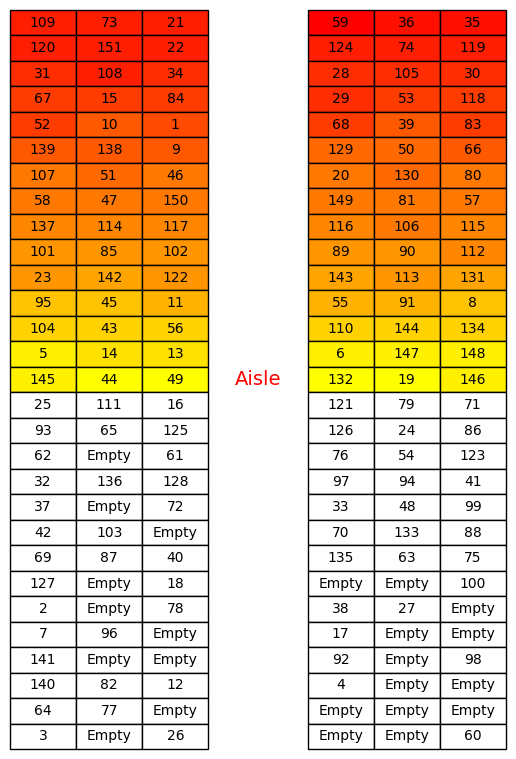

In [19]:

def create_table(ax, data, colors):
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 2])
    rows, cols = len(data), len(data[0])
    width, height = 100 , 100 


    for i in range(rows):
        for j in range(cols):
            table.add_cell(i, j, width, height, text=data[i][j], loc='center', facecolor=colors[i][j])

    ax.add_table(table)


fig, (ax1, ax2) = plt.subplots(1, 2)

create_table(ax1, data1, colors1)
create_table(ax2, data2, colors2)


ax1.annotate('Aisle', xy=(1, 1), xytext=(1.25, 1),
             textcoords='axes fraction', ha='center', va='center', color='red', fontsize=14)



plt.subplots_adjust(wspace=0.5)

plt.show()

- Disabled visualization

In [20]:
data1 = [['Empty' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]
data2 = [['Empty' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]

colors1 = [[ '#FFFFFF' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]
colors2 = [[ '#FFFFFF' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]

for i in range(1, number_of_rows + 1):
    for j in range(1, number_of_columns + 1):
        for k in range(1, len(Passagers) + 1):
            if AssignmenVarDict[(i,j,k)].x == 1:
                if j<4:
                    data1[i-1][j-1] = k
                    if Passagers[k]['gender']==2 :
                        colors1[i-1][j-1] = '#800080'
                        colors1[i-1][j-2] = '#800080'
                        colors1[i][j-1] = '#800080'
                        colors1[i][j-2] = '#800080'
                else:
                    data2[i-1][j-4] = k
                    if Passagers[k]['gender']==2:
                        colors2[i-1][j-4] = '#800080'
                        colors2[i-1][j-5] = '#800080'
                        colors2[i][j-4] = '#800080'
                        colors2[i][j-5] = '#800080'




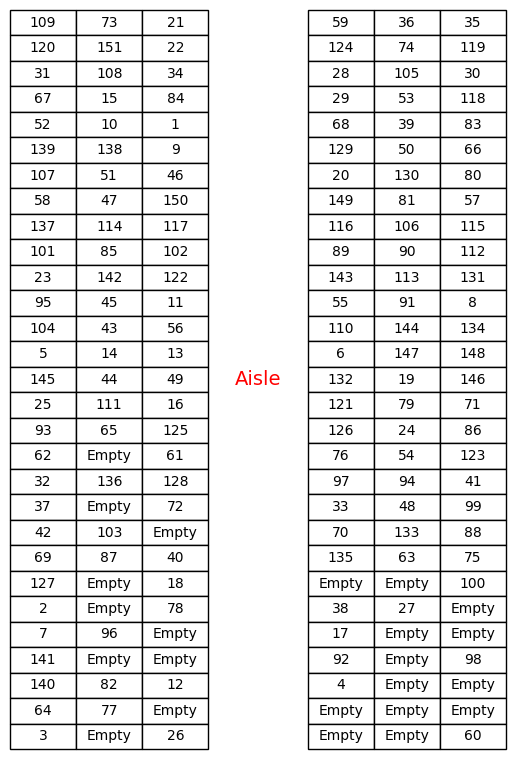

In [21]:
def create_table(ax, data, colors):
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 2])
    rows, cols = len(data), len(data[0])
    width, height = 100 , 100 


    for i in range(rows):
        for j in range(cols):
            table.add_cell(i, j, width, height, text=data[i][j], loc='center', facecolor=colors[i][j])

    ax.add_table(table)


fig, (ax1, ax2) = plt.subplots(1, 2)

create_table(ax1, data1, colors1)
create_table(ax2, data2, colors2)


ax1.annotate('Aisle', xy=(1, 1), xytext=(1.25, 1),
             textcoords='axes fraction', ha='center', va='center', color='red', fontsize=14)



plt.subplots_adjust(wspace=0.5)

plt.show()

## Objectif Grouping

- 1st formulation

In [22]:
"""grouping = quicksum([AssignmenVarDict[(i_1, j_1, group[k_1])] * AssignmenVarDict[(i_2, j_2, group[k_2])] * (0.7 * abs(i_1 - i_2) + 0.3 * abs(j_1 - j_2)) \
                     for group in Groups.values() \
                     for k_1 in range(len(group)) \
                     for k_2 in range(k_1 + 1, len(group)) \
                     for i_1 in range(1, number_of_rows + 1) \
                     for j_1 in range(1, number_of_columns + 1) \
                     for i_2 in range(1, number_of_rows + 1) \
                     for j_2 in range(1, number_of_columns + 1)])

m.setObjective(grouping, GRB.MINIMIZE)

m.params.outputflag = 0 

m.update()"""

'grouping = quicksum([AssignmenVarDict[(i_1, j_1, group[k_1])] * AssignmenVarDict[(i_2, j_2, group[k_2])] * (0.7 * abs(i_1 - i_2) + 0.3 * abs(j_1 - j_2))                      for group in Groups.values()                      for k_1 in range(len(group))                      for k_2 in range(k_1 + 1, len(group))                      for i_1 in range(1, number_of_rows + 1)                      for j_1 in range(1, number_of_columns + 1)                      for i_2 in range(1, number_of_rows + 1)                      for j_2 in range(1, number_of_columns + 1)])\n\nm.setObjective(grouping, GRB.MINIMIZE)\n\nm.params.outputflag = 0 \n\nm.update()'

- 2nd Formulation

In [23]:
DECOUPLINGVAR = {(i,j,k_1, k_2): m.addVar(vtype = GRB.BINARY, name=f'passager_{i}_{j}_{k_1}_{k_2}')
                 for i in range(1, number_of_rows+1)
                 for j in range(1, number_of_columns)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [24]:
DECOUPLINGVAR_Extended = {(i,j,k_1, k_2): m.addVar(vtype = GRB.BINARY, name=f'passager_{i}_{j}_{k_1}_{k_2}')
                 for i in range(1, number_of_rows)
                 for j in range(1, number_of_columns+1)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [25]:
DECOUPLINGCONST1 = {(i,j,k_1,k_2): m.addConstr(DECOUPLINGVAR[(i,j,k_1,k_2)]<= AssignmenVarDict[(i,j,k_1)])
                                     for i in range(1, number_of_rows+1)
                 for j in range(1, number_of_columns)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [26]:
DECOUPLINGCONST1_Extended = {(i,j,k_1,k_2): m.addConstr(DECOUPLINGVAR_Extended[(i,j,k_1,k_2)]<= AssignmenVarDict[(i,j,k_1)])
                                     for i in range(1, number_of_rows)
                 for j in range(1, number_of_columns+1)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [27]:
DECOUPLINGCONST2 = {(i,j,k_1,k_2): m.addConstr(DECOUPLINGVAR[(i,j,k_1,k_2)]<= AssignmenVarDict[(i,j+1,k_2)])
                                     for i in range(1, number_of_rows+1)
                 for j in range(1, number_of_columns)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [28]:
DECOUPLINGCONST2_Extended = {(i,j,k_1,k_2): m.addConstr(DECOUPLINGVAR_Extended[(i,j,k_1,k_2)]<= AssignmenVarDict[(i+1,j,k_2)])
                                     for i in range(1, number_of_rows)
                 for j in range(1, number_of_columns+1)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [29]:
DECOUPLINGCONST3 = {(i,j,k_1,k_2): m.addConstr(DECOUPLINGVAR[(i,j,k_1,k_2)]>= AssignmenVarDict[(i,j,k_1)]- (1- AssignmenVarDict[(i,j+1,k_2)]))
                                     for i in range(1, number_of_rows+1)
                 for j in range(1, number_of_columns)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [30]:
DECOUPLINGCONST3 = {(i,j,k_1,k_2): m.addConstr(DECOUPLINGVAR_Extended[(i,j,k_1,k_2)]>= AssignmenVarDict[(i,j,k_1)]- (1- AssignmenVarDict[(i+1,j,k_2)]))
                                     for i in range(1, number_of_rows)
                 for j in range(1, number_of_columns+1)
                 for k_1 in Passager_Group
                 for k_2 in Passager_Group[k_1]}

In [31]:
grouping = quicksum([10*DECOUPLINGVAR[(i,j,k_1,k_2)] \
                        for i in range(1, number_of_rows + 1) \
                        for j in [1,2,4,5] \
                      for k_1 in Passager_Group
                      for k_2 in Passager_Group[k_1] ])    

grouping_aisle = quicksum([5*DECOUPLINGVAR[(i,3,k_1,k_2)] \
                        for i in range(1, number_of_rows + 1) \
                      for k_1 in Passager_Group
                      for k_2 in Passager_Group[k_1] ])

grouping_extended = quicksum([DECOUPLINGVAR_Extended[(i,j,k_1,k_2)] \
                        for i in range(1, number_of_rows ) \
                        for j in range(1, number_of_columns+1) \
                      for k_1 in Passager_Group
                      for k_2 in Passager_Group[k_1] ])                   

m.setObjective(grouping + grouping_aisle + grouping_extended, GRB.MAXIMIZE)

m.params.outputflag = 1

m.update()

Set parameter OutputFlag to value 1


- 3rd formulation

In [32]:
"""grouping = quicksum([AssignmenVarDict[(i, j, k_1)] + AssignmenVarDict[(i, j+1, k_2)] \
                        for i in range(1, number_of_rows + 1) \
                        for j in range(1, number_of_columns) \
                      for k_1 in Passager_Group
                      for k_2 in Passager_Group[k_1] ])                     

m.setObjective(grouping, GRB.MAXIMIZE)

m.params.outputflag = 0 

m.update()"""

'grouping = quicksum([AssignmenVarDict[(i, j, k_1)] + AssignmenVarDict[(i, j+1, k_2)]                         for i in range(1, number_of_rows + 1)                         for j in range(1, number_of_columns)                       for k_1 in Passager_Group\n                      for k_2 in Passager_Group[k_1] ])                     \n\nm.setObjective(grouping, GRB.MAXIMIZE)\n\nm.params.outputflag = 0 \n\nm.update()'

## Optimisation


In [33]:
# Set iteration limit
#m.setParam(GRB.Param.IterationLimit, 100000)
m.optimize()


if m.status == GRB.INF_OR_UNBD:
    m.setParam(GRB.Param.Presolve, 0)
    m.optimize()

if m.status == GRB.INFEASIBLE:
    print(m.display(), "\n\tTHERE IS NO SOLUTION!!!")
elif m.status == GRB.UNBOUNDED:
    print(m.display(), "\n\tNOT BOUNDED!!!")
else:
    print(f'z* = {round(m.objVal, 2)}'.center(8*14))

print()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88596 rows, 55696 columns and 389872 nonzeros
Model fingerprint: 0xdcd3606a
Variable types: 0 continuous, 55696 integer (55696 binary)
Coefficient statistics:
  Matrix range     [7e-03, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]

MIP start from previous solve produced solution with objective 63 (0.06s)
Loaded MIP start from previous solve with objective 63

Presolve removed 29423 rows and 0 columns
Presolve time: 1.06s
Presolved: 59173 rows, 55696 columns, 264762 nonzeros
Variable types: 0 continuous, 55696 integer (55696 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.01s

Solved with d

- Grouping Visualization

In [ ]:

def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):

        red = random.randint(0, 255)
        green = random.randint(0, 255)
        blue = random.randint(0, 255)

        color_value = "#{:02X}{:02X}{:02X}".format(red, green, blue)
        colors.append(color_value)
    return colors

graduation = generate_random_colors(len(Groups))
indices_groups = list(Groups.keys())
color_group = {indices_groups[i-1] : graduation[i-1] for i in range(1, len(Groups)+1)}


In [ ]:
data1 = [['Empty' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]
data2 = [['Empty' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]

colors1 = [[ '#FFFFFF' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]
colors2 = [[ '#FFFFFF' for _ in range(number_of_columns//2)] for _ in range(number_of_rows)]

for i in range(1, number_of_rows + 1):
    for j in range(1, number_of_columns + 1):
        for k in range(1, len(Passagers) + 1):
            if AssignmenVarDict[(i,j,k)].x == 1:
                if j<4:
                    data1[i-1][j-1] = k
                    if Passagers[k]['group']in color_group: colors1[i-1][j-1] = color_group[Passagers[k]['group']]
                else:
                    data2[i-1][j-4] = k
                    if Passagers[k]['group'] in color_group: colors2[i-1][j-4] = color_group[Passagers[k]['group']]

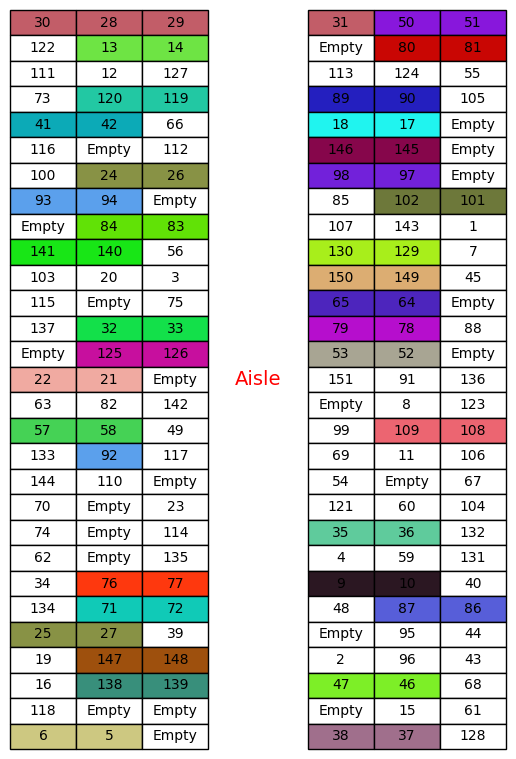

In [ ]:
def create_table(ax, data, colors):
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 2])
    rows, cols = len(data), len(data[0])
    width, height = 100 , 100 


    for i in range(rows):
        for j in range(cols):
            table.add_cell(i, j, width, height, text=data[i][j], loc='center', facecolor=colors[i][j])

    ax.add_table(table)


fig, (ax1, ax2) = plt.subplots(1, 2)

create_table(ax1, data1, colors1)
create_table(ax2, data2, colors2)


ax1.annotate('Aisle', xy=(1, 1), xytext=(1.25, 1),
             textcoords='axes fraction', ha='center', va='center', color='red', fontsize=14)



plt.subplots_adjust(wspace=0.5)

plt.show()